In [429]:
# imports
# numpy, pandas, scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

# estimators, sklearn is a portion of the Estimator Object
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

# model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

# cross validation
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

import os

os.getcwd()

'C:\\Users\\rrica'

In [430]:
# data
rawData = pd.read_csv('default of credit card clients.csv', header=1)
rawData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [431]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [432]:
print(rawData.iloc[1,1])
print(rawData['SEX'])
print(rawData.iloc[2:6,0:2])

# features
features = rawData.iloc[:,12:23]
print('Summary of features sample')
features.head()

120000
0        2
1        2
2        2
3        2
4        1
        ..
29995    1
29996    1
29997    1
29998    1
29999    1
Name: SEX, Length: 30000, dtype: int64
   ID  LIMIT_BAL
2   3      90000
3   4      50000
4   5      50000
5   6      50000
Summary of features sample


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,3913,3102,689,0,0,0,0,689,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689


In [433]:
# dependent variable
depVar = rawData['PAY_AMT6']
print(depVar.iloc[1:3])

1    2000
2    5000
Name: PAY_AMT6, dtype: int64


In [434]:
# Training Set (Feature Space: X Training)
X_Train = (features[:1000])
X_Train.head()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,3913,3102,689,0,0,0,0,689,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689


In [435]:
# Dependent Variable Training Set (y Training)
y_train = depVar[: 1000]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 1000


0       0
1    2000
2    5000
3    1000
4     679
Name: PAY_AMT6, dtype: int64

In [436]:
# Testing Set (X Testing)
X_test = features[-100:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 100
       BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
29900      16809          0          0          0          0          0   
29901      50845      48750     103486      50590      50248      49387   
29902      10392     168088     168955     161351     126198     124746   
29903      27378      17082      13333         99         99     172104   
29904      54952      56021      54126      58732      59306      59728   

       PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  
29900         0         0         0         0         0  
29901         0      6556      3250      1563      1208  
29902    168096      6409      7335      4448      4519  
29903     10018     13333        99        99    172104  
29904      2600      4553      5800      2000      1000  


In [437]:
# Ground Truth (y_test) 
y_test = depVar[-100:]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 100


29900        0
29901      781
29902     5003
29903    30013
29904     1462
Name: PAY_AMT6, dtype: int64

In [438]:
# 2. Select the Dependent Variable
# dependent variable
depVar = rawData['PAY_AMT6']

# 3. Establish the training set for the X-variables or Feature space 
# (first 1000 rows: only for this example you will still follow a 70/30 split for your final models)
# Training Set (Feature Space: X Training)
X_train = (features[: 1000])
X_train.head()

# 4. Establish the training set for the Y-variable or dependent variable (the number of rows much match the X-training set)
# Dependent Variable Training Set (y Training)
y_train = depVar[: 1000]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

# We can implement Cross Validation anytime we need to by simply running the following on the X and Y training sets:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)

# We can also use the shape function to double check that the split was made as needed:
X_train.shape, X_test.shape

# We've already established out training and testing sets we can easily cross validate by 
# using sklearn.model_selection on our datasets as follows:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)
X_train.shape, X_test.shape

The number of observations in the Y training set are: 1000


((562, 11), (188, 11))

In [439]:
model = LinearRegression(n_jobs=10)

In [440]:
########################################################################
#####      2. Building the Models and Choosing the Right Model     #####
########################################################################

# Models
modelSVR = SVR()
modelRF = RandomForestRegressor()
modelLR = LinearRegression()

In [441]:
# features
features = rawData.iloc[:,12:23]
print('Summary of feature sample')
features.head()

Summary of feature sample


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,3913,3102,689,0,0,0,0,689,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689


In [442]:
# dependent variable
print(depVar)

0           0
1        2000
2        5000
3        1000
4         679
         ... 
29995    1000
29996       0
29997    3100
29998    1804
29999    1000
Name: PAY_AMT6, Length: 30000, dtype: int64


In [443]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=10, normalize=False)

In [444]:
modelRF.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [445]:
modelSVR.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [446]:
modelLR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [447]:
############################################
#####     Choosing the Right Model     #####
############################################

print(cross_val_score(modelSVR, X_train, y_train)) 

#####################################################################################
# [-0.02738768 -0.06746915 -0.14855097 ...]
# These values correspond to the the following:
#   1st value:  The score array for test scores on each cv split. 
#               (Higher is an indicator of a better performing model)
#   2nd value: The time for fitting the estimator on the train set for each cv split.
#   3rd Value:  The time for scoring the estimator on the test set for each cv split. 
#####################################################################################

[-0.02197668 -0.12610779 -0.03097599 -0.07184052 -0.08207397]


In [448]:
print(cross_val_score(modelRF, X_train, y_train)) 

[ 0.08586768 -0.9278305   0.13374163  0.18520127  0.03870313]


In [449]:
print(cross_val_score(modelLR, X_train, y_train)) 

[  0.45745822 -14.72846323   0.59889444  -1.08199117  -0.61314129]


In [450]:
# The default metric for model.score for Regression models in Sci-Kit Learn is R-Squared.
model.score(X_train,y_train)

0.6602950203265826

In [451]:
# 1. Random Forest Regression Model Fitting and Scoring
# Model Fitting
modelRF.fit(X_train,y_train)
print(cross_val_score(modelRF, X_train, y_train))
modelRF.score(X_train,y_train)

[ 0.03730196 -0.73599518  0.13874697  0.1180607  -0.05969199]


0.8779009075557221

In [452]:
# 2.Support Vector Regression Model Fitting and Scoring
modelSVR.fit(X_train,y_train)
print(cross_val_score(modelSVR, X_train, y_train)) 
modelSVR.score(X_train,y_train)

[-0.02197668 -0.12610779 -0.03097599 -0.07184052 -0.08207397]


-0.027234837637096554

In [453]:
# 3. Linear Regression Model Fitting and Scoring
modelLR.fit(X_train,y_train)
print(cross_val_score(modelLR, X_train, y_train)) 
modelLR.score(X_train,y_train)

[  0.45745822 -14.72846323   0.59889444  -1.08199117  -0.61314129]


0.6602950203265826

In [454]:
#####################################################################################
#####               Making Predictions and Evaluating the Results               #####
#####################################################################################

# Random Forest model your previously created
predictions = modelRF.predict(X_test)

In [455]:
# Evaluating the Results
# 1. The sklearn.metrics Object is the main object that contains almost all of the metric 
# functions you will need. Verify that the first two are in your imported list of libraries 
# (you'll see some familiarity in their names):

# We can use the sqrt function and the mean_squared_error function to compose 
# your own function for calculating RMSE:
rmse = sqrt(mean_squared_error(y_test, predictions))

# We establish a variable and use the included function, the ground truth, and the predictions 
# to calculate R Squared as follows:
predRsquared = r2_score(y_test,predictions)

In [456]:
# Here is how it all looks together:
#Make Predictions
predictions = modelRF.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: -0.343
RMSE: 11271.747


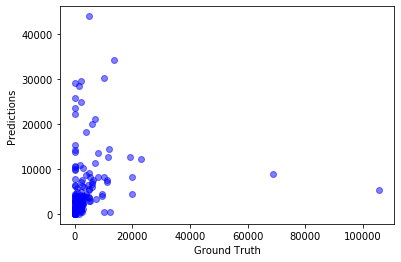

In [457]:
# Plotting the Results
# Revisar por qué no funciona como parámetro en la función scatter color=['blue','green'],
plt.scatter(y_test, predictions, c='blue', alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [458]:
########################################################################
########################################################################
#####     Default of Credit Card Clients - Modelos Predictivos     #####
########################################################################
########################################################################

## Cargar paquetes utilizados en el proyecto

import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import gc
from datetime import datetime 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
!pip install lightgbm
import lightgbm as lgb
!pip install xgboost
import xgboost as xgb

pd.set_option('display.max_columns', 100)

In [459]:
## Leer datos por defecto de los clientes de tarjetas de crédito

credit_df = pd.read_csv('default of credit card clients.csv', header=1)
print("Datos de las tarjetas de créditos de clientes - líneas:", credit_df.shape[0]," columnas:", credit_df.shape[1])

Datos de las tarjetas de créditos de clientes - líneas: 30000  columnas: 25


In [460]:
credit_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [461]:
credit_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [462]:
credit_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [463]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [464]:
## Validar datos nulos

totalDatosNulos = credit_df.isnull().sum().sort_values(ascending = False)
porcentaje = (credit_df.isnull().sum()/credit_df.isnull().count()*100).sort_values(ascending = False)
pd.concat([totalDatosNulos, porcentaje], axis=1, keys=['Total', 'Porcenjate']).transpose()

,default payment next month,PAY_6,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,BILL_AMT1,PAY_AMT6,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,ID
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Porcenjate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


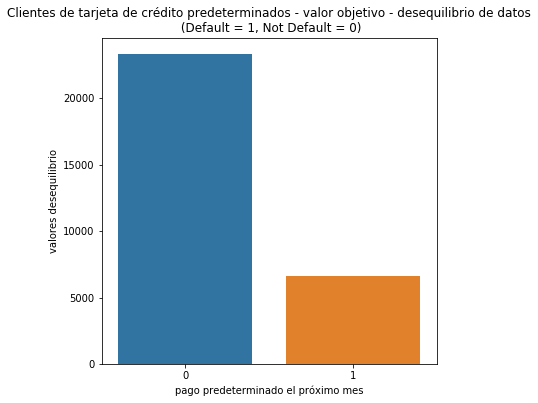

In [465]:
## Desequilibrio en los datos

temp = credit_df["default payment next month"].value_counts()

df = pd.DataFrame({'default payment next month': temp.index,'values': temp.values})
plt.figure(figsize = (6,6))

sns.set_color_codes("pastel")
sns.barplot(x = 'default payment next month', y="values", data=df)

# Add title and axis names
plt.title('Clientes de tarjeta de crédito predeterminados - valor objetivo - desequilibrio de datos\n (Default = 1, Not Default = 0)')
plt.xlabel('pago predeterminado el próximo mes')
plt.ylabel('valores desequilibrio')

locs, labels = plt.xticks()
plt.show()

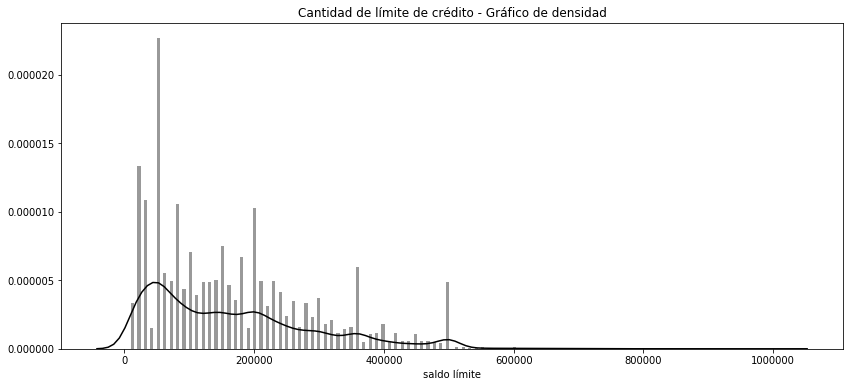

In [466]:
########################################################################
#####                     Explorando los datos                     #####
########################################################################

## Cantidad de límite de crédito
plt.figure(figsize = (14,6))
plt.title('Cantidad de límite de crédito - Gráfico de densidad')
sns.set_color_codes("pastel")

sns.distplot(credit_df['LIMIT_BAL'], bins=200, kde=True, color="black")

plt.xlabel('saldo límite')

plt.show()

In [467]:
credit_df['LIMIT_BAL'].value_counts().shape

(81,)

In [468]:
credit_df['LIMIT_BAL'].value_counts().head()

50000     3365
20000     1976
30000     1610
80000     1567
200000    1528
Name: LIMIT_BAL, dtype: int64

In [469]:
lb_low = credit_df["LIMIT_BAL"].quantile(0.01)
lb_hi  = credit_df["LIMIT_BAL"].quantile(0.99)

credit_df_filtered = credit_df[(credit_df["LIMIT_BAL"] < q_hi) & (credit_df["LIMIT_BAL"] > q_low)]

credit_df_filtered.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,28579.000000,28579.000000,28579.000000,28579.000000,28579.000000,28579.000000,28579.000000,28579.000000,28579.000000,28579.000000,28579.000000,28579.000000,28579.000000,28579.000000,28579.000000,28579.000000,28579.000000,28579.000000,28579.000000,2.857900e+04,28579.000000,28579.000000,28579.000000,28579.000000,28579.000000
mean,14995.925680,158694.484762,1.609399,1.858812,1.552294,35.405018,-0.009587,-0.128556,-0.162532,-0.219462,-0.266209,-0.289618,50227.438994,48275.772980,45998.711187,42212.012667,39332.675111,37908.000210,5413.882046,5.485878e+03,4851.116939,4545.746247,4437.589979,4805.296826,0.221666
std,8651.273421,113983.222794,0.487894,0.789596,0.522052,9.189715,1.121329,1.195726,1.194384,1.164861,1.129620,1.145326,69190.149821,67052.625341,64786.053582,60306.545467,56954.094136,55880.782768,15751.890640,1.845019e+04,15364.195963,14770.078220,13461.462339,15739.735660,0.415375
min,1.000000,16000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-157264.000000,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7514.500000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3501.500000,2935.000000,2576.500000,2215.500000,1683.000000,1202.500000,967.500000,8.000000e+02,390.000000,299.000000,256.000000,109.000000,0.000000
50%,15031.000000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23436.000000,22303.000000,20615.000000,19331.000000,18440.000000,17495.000000,2100.000000,2.004000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,22461.500000,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67291.000000,64131.500000,60158.500000,54360.000000,50033.000000,49052.000000,5000.000000,5.000000e+03,4326.500000,4000.000000,4000.000000,4000.000000,0.000000
max,30000.000000,490000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,626648.000000,743970.000000,855086.000000,628699.000000,547880.000000,699944.000000,873552.000000,1.215471e+06,889043.000000,621000.000000,332000.000000,403500.000000,1.000000


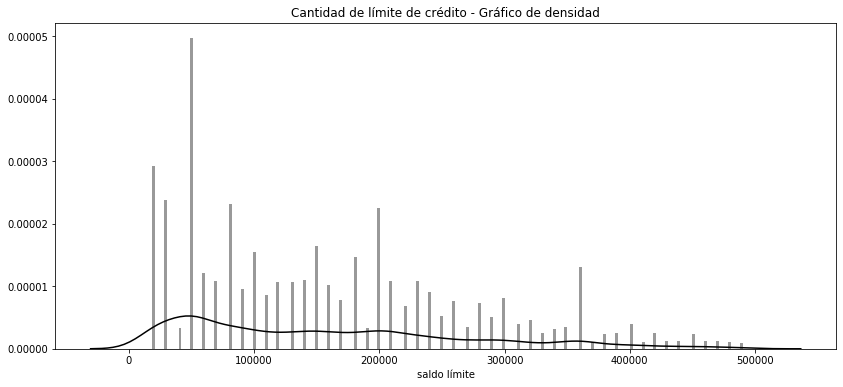

In [470]:
## Cantidad de límite de crédito

plt.figure(figsize = (14,6))
plt.title('Cantidad de límite de crédito - Gráfico de densidad')
sns.set_color_codes("pastel")

sns.distplot(credit_df_filtered['LIMIT_BAL'], bins=200, kde=True, color="black")

plt.xlabel('saldo límite')

plt.show()

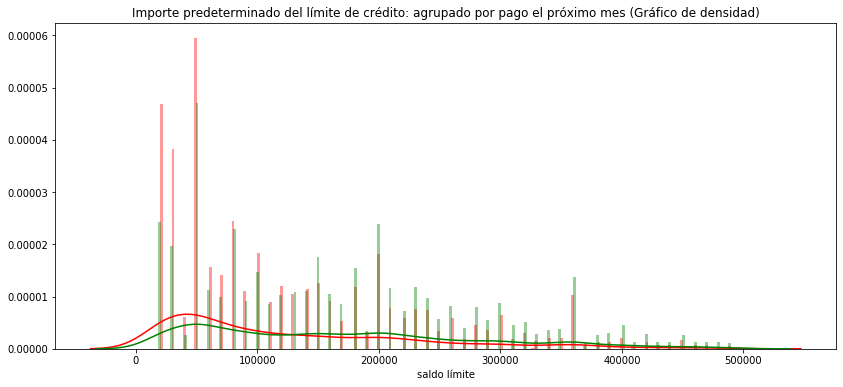

In [471]:
## Cantidad de límite de crédito agrupada por pago predeterminado el próximo mes

clsNoDefault = credit_df_filtered.loc[credit_df_filtered['default payment next month'] == 0]["LIMIT_BAL"]
clsDefault = credit_df_filtered.loc[credit_df_filtered['default payment next month'] == 1]["LIMIT_BAL"]

plt.figure(figsize = (14,6))

plt.title('Importe predeterminado del límite de crédito: agrupado por pago el próximo mes (Gráfico de densidad)')
sns.set_color_codes("pastel")
sns.distplot(clsDefault, kde=True, bins=200, color="red")
sns.distplot(clsNoDefault, kde=True, bins=200, color="green")
plt.xlabel('saldo límite')

plt.show()

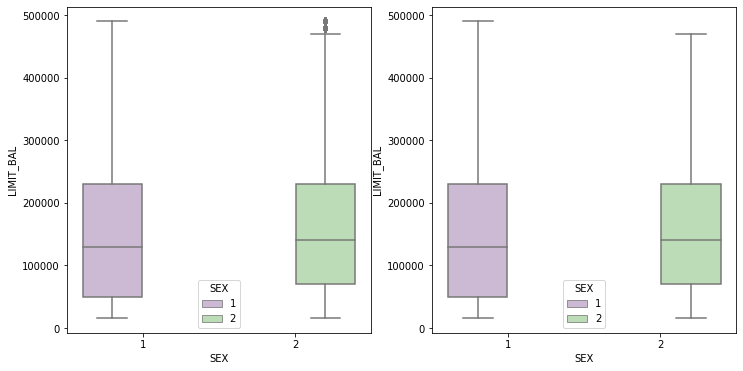

In [472]:
## Límite de crédito vs. sexo

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))

s = sns.boxplot(ax = ax1, x="SEX", y="LIMIT_BAL", hue="SEX", data=credit_df_filtered, palette="PRGn", showfliers=True)
s = sns.boxplot(ax = ax2, x="SEX", y="LIMIT_BAL", hue="SEX", data=credit_df_filtered, palette="PRGn", showfliers=False)

plt.show();

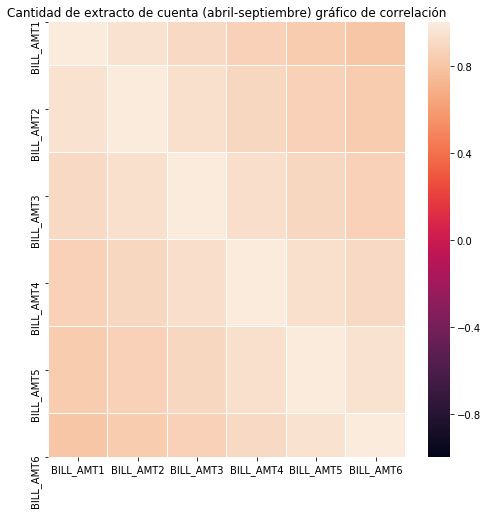

In [473]:
## Características de correlación

varBillAMT = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

plt.figure(figsize = (8,8))
plt.title('Cantidad de extracto de cuenta (abril-septiembre) gráfico de correlación')

corr = credit_df_filtered[varBillAMT].corr()

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.1, vmin=-1, vmax=1)

plt.show()

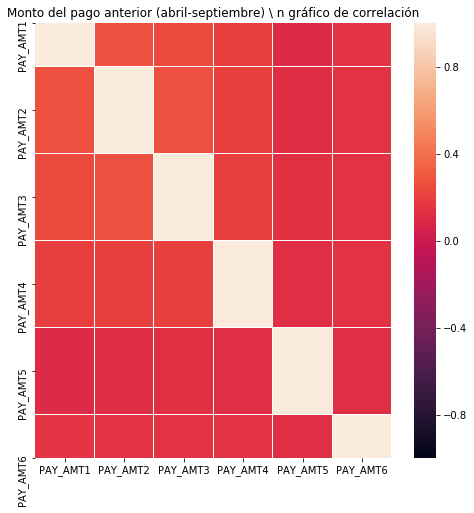

In [474]:
varPayAMT = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

plt.figure(figsize = (8,8))
plt.title('Monto del pago anterior (abril-septiembre) \ n gráfico de correlación')

corr = credit_df_filtered[varPayAMT].corr()

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.1, vmin=-1, vmax=1)

plt.show()

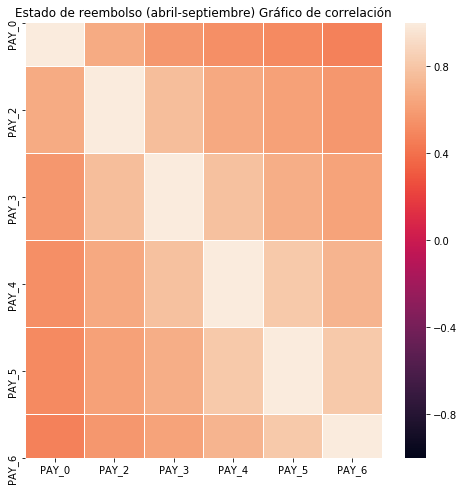

In [475]:
varPay = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

plt.figure(figsize = (8,8))
plt.title('Estado de reembolso (abril-septiembre) Gráfico de correlación')

corr = credit_df_filtered[varPay].corr()

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.1, vmin=-1, vmax=1)

plt.show()

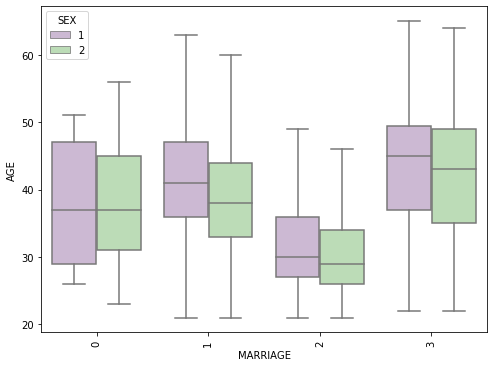

In [476]:
## Sexo, educación, edad y matrimonio

def boxplot_variation(f1, f2, f3, width=16):
    fig, ax1 = plt.subplots(ncols=1, figsize=(width,6))
    s = sns.boxplot(ax = ax1, x=f1, y=f2, hue=f3,
                data=credit_df_filtered, palette="PRGn", showfliers=False)
    s.set_xticklabels(s.get_xticklabels(), rotation=90)
    plt.show();
    
boxplot_variation('MARRIAGE','AGE', 'SEX',8)

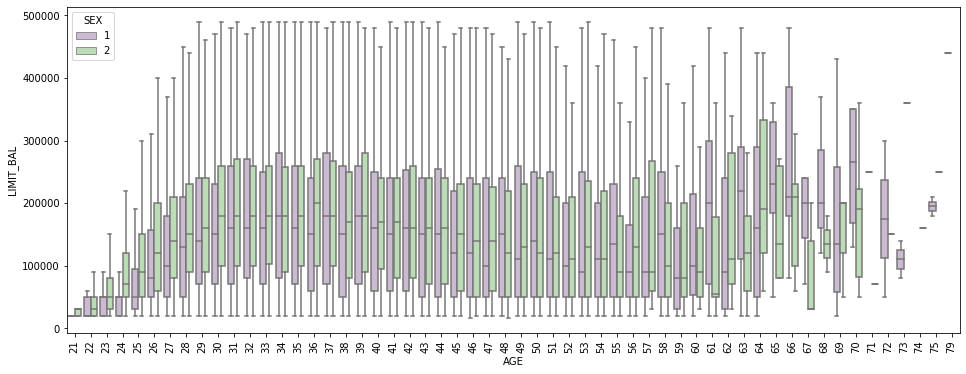

In [477]:
boxplot_variation('AGE','LIMIT_BAL', 'SEX',16)

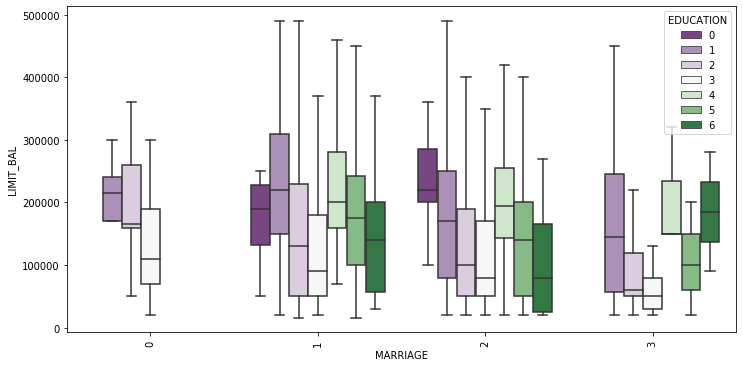

In [478]:
## Estado civil, nivel educativo y límite de crédito

boxplot_variation('MARRIAGE','LIMIT_BAL', 'EDUCATION',12)

In [479]:
## Modelos predictivos
## Definir predictores y valores objetivo

varDependiente = 'default payment next month'
varIndependientes = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 
                     'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 
                     'BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                     'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [480]:
## Dividir datos en tren y conjunto de validación

train_credit_df_filtered, val_credit_df_filtered = train_test_split(credit_df_filtered, test_size = 0.20, random_state = 2018, shuffle=True )

train_credit_df_filtered_bkp = train_credit_df_filtered.copy()
val_credit_df_filtered_bkp =val_credit_df_filtered.copy()

In [481]:
## Random Forest Classifier

clfRF = RandomForestClassifier(n_jobs = 4, 
                               random_state = 2018,
                               criterion = 'gini',
                               n_estimators = 100,
                               verbose = False)

In [482]:
clfRF.fit(train_credit_df_filtered[varIndependientes], train_credit_df_filtered[varDependiente].values)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
                       oob_score=False, random_state=2018, verbose=False,
                       warm_start=False)

In [483]:
predictores = clfRF.predict(val_credit_df_filtered[varIndependientes])

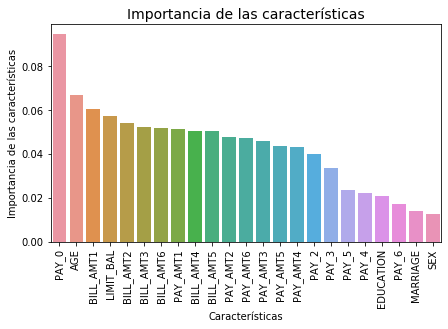

In [484]:
## Features importance

temporal = pd.DataFrame({'Feature': varIndependientes, 'Feature importance': clfRF.feature_importances_})
temporal = temporal.sort_values(by='Feature importance', ascending=False)

plt.figure(figsize = (7,4))
plt.title('Importancia de las características', fontsize=14)

s = sns.barplot(x='Feature', y='Feature importance', data=temporal)
s.set_xticklabels(s.get_xticklabels(), rotation=90)

plt.xlabel('Características')
plt.ylabel('Importancia de las características')

plt.show()  

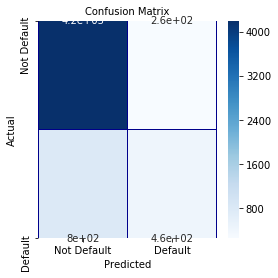

In [485]:
## Confusion matrix

ct = pd.crosstab(val_credit_df_filtered[varDependiente].values, predictores, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(4,4))
sns.heatmap(ct, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,
            ax=ax1,
            linewidths=.2,
            linecolor="Darkblue", 
            cmap="Blues")
plt.title('Confusion Matrix', fontsize=10)
plt.show()

In [486]:
roc_auc_score(val_credit_df_filtered[varDependiente].values, predictores)

0.6529639000293134

In [487]:
## RandomForrest con OneHotEncoder

cat_caracteristicas = ['EDUCATION', 'SEX', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

train_fea_df = pd.get_dummies(train_credit_df_filtered_bkp, columns = cat_caracteristicas)
val_fea_df = pd.get_dummies(val_credit_df_filtered_bkp, columns = cat_caracteristicas)

print("Valor predeterminado de datos de entrenamiento de clientes de tarjetas de crédito - filas:",train_fea_df.shape[0]," columnas:", train_fea_df.shape[1])
print("Valor predeterminado de los datos val de los clientes de la tarjeta de crédito - filas:",val_fea_df.shape[0]," columnas:", val_fea_df.shape[1])

Valor predeterminado de datos de entrenamiento de clientes de tarjetas de crédito - filas: 22863  columnas: 93
Valor predeterminado de los datos val de los clientes de la tarjeta de crédito - filas: 5716  columnas: 86


In [488]:
train_feaali_df, val_feaali_df = train_fea_df.align(val_fea_df, join='outer', axis=1, fill_value=0)

print("Valor predeterminado de datos de entrenamiento de clientes de tarjetas de crédito - filas:",train_feaali_df.shape[0]," columnas:", train_feaali_df.shape[1])
print("Valor predeterminado de los datos val de los clientes de la tarjeta de crédito - filas:",val_feaali_df.shape[0]," columnas:", val_feaali_df.shape[1])

Valor predeterminado de datos de entrenamiento de clientes de tarjetas de crédito - filas: 22863  columnas: 93
Valor predeterminado de los datos val de los clientes de la tarjeta de crédito - filas: 5716  columnas: 93


In [489]:
train_feaali_df.head(5)

,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,ID,LIMIT_BAL,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY_0_-1,PAY_0_-2,PAY_0_0,PAY_0_1,PAY_0_2,PAY_0_3,PAY_0_4,PAY_0_5,PAY_0_6,PAY_0_7,PAY_0_8,PAY_2_-1,PAY_2_-2,PAY_2_0,PAY_2_1,PAY_2_2,PAY_2_3,PAY_2_4,PAY_2_5,PAY_2_6,PAY_2_7,PAY_2_8,PAY_3_-1,PAY_3_-2,PAY_3_0,PAY_3_1,PAY_3_2,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_6,PAY_3_7,PAY_3_8,PAY_4_-1,PAY_4_-2,PAY_4_0,PAY_4_1,PAY_4_2,PAY_4_3,PAY_4_4,PAY_4_5,PAY_4_6,PAY_4_7,PAY_4_8,PAY_5_-1,PAY_5_-2,PAY_5_0,PAY_5_2,PAY_5_3,PAY_5_4,PAY_5_5,PAY_5_6,PAY_5_7,PAY_5_8,PAY_6_-1,PAY_6_-2,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_1,SEX_2,default payment next month
20570,26,1847,3614,3252,42058,33171,18379,0,1,0,0,0,0,0,20571,100000,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2000,2000,42058,500,2000,2000,1,0,0
17338,30,3836,4380,1169,779,566,1361,0,1,0,0,0,0,0,17339,30000,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1016,1169,0,567,1365,1834,0,1,0
16578,29,25264,24560,29128,29845,30257,30779,0,1,0,0,0,0,0,16579,30000,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,5000,1500,1200,1300,0,1,0,1
6609,47,46179,82842,77628,52294,0,0,0,1,0,0,0,0,0,6610,420000,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,84459,79192,57145,0,0,0,1,0,0
24572,36,52045,49714,50908,49756,27702,27429,0,0,1,0,0,0,0,24573,50000,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2000,2005,1432,1008,3007,2003,1,0,0


In [490]:
val_feaali_df.head(5)

,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,ID,LIMIT_BAL,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY_0_-1,PAY_0_-2,PAY_0_0,PAY_0_1,PAY_0_2,PAY_0_3,PAY_0_4,PAY_0_5,PAY_0_6,PAY_0_7,PAY_0_8,PAY_2_-1,PAY_2_-2,PAY_2_0,PAY_2_1,PAY_2_2,PAY_2_3,PAY_2_4,PAY_2_5,PAY_2_6,PAY_2_7,PAY_2_8,PAY_3_-1,PAY_3_-2,PAY_3_0,PAY_3_1,PAY_3_2,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_6,PAY_3_7,PAY_3_8,PAY_4_-1,PAY_4_-2,PAY_4_0,PAY_4_1,PAY_4_2,PAY_4_3,PAY_4_4,PAY_4_5,PAY_4_6,PAY_4_7,PAY_4_8,PAY_5_-1,PAY_5_-2,PAY_5_0,PAY_5_2,PAY_5_3,PAY_5_4,PAY_5_5,PAY_5_6,PAY_5_7,PAY_5_8,PAY_6_-1,PAY_6_-2,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_1,SEX_2,default payment next month
19024,26,23758,0,0,0,0,0,0,0,1,0,0,0,0,19025,230000,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
19950,37,85405,84922,84870,69725,54744,9234,0,0,0,1,0,0,0,19951,300000,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3479,3319,2210,1095,1594,126463,0,1,0
14483,34,8834,7499,8147,7247,4617,0,0,1,0,0,0,0,0,14484,20000,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1000,1000,1300,1500,1680,0,1,0,1
21384,68,8207,11054,15840,20542,25255,30034,0,1,0,0,0,0,0,21385,370000,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3000,5000,5000,5000,5000,5000,1,0,0
20697,42,42238,29224,23807,17623,17974,18350,0,0,0,1,0,0,0,20698,50000,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1425,2000,1293,644,666,676,1,0,0


In [491]:
objetivo_f = 'default payment next month'
predictores_f = ['AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
                 'BILL_AMT5', 'BILL_AMT6', 'EDUCATION_0', 'EDUCATION_1',
                 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 'EDUCATION_5',
                 'EDUCATION_6', 'LIMIT_BAL', 'MARRIAGE_0', 'MARRIAGE_1',
                 'MARRIAGE_2', 'MARRIAGE_3', 'PAY_0_-1', 'PAY_0_-2', 'PAY_0_0',
                 'PAY_0_1', 'PAY_0_2', 'PAY_0_3', 'PAY_0_4', 'PAY_0_5', 'PAY_0_6',
                 'PAY_0_7', 'PAY_0_8', 'PAY_2_-1', 'PAY_2_-2', 'PAY_2_0', 'PAY_2_1',
                 'PAY_2_2', 'PAY_2_3', 'PAY_2_4', 'PAY_2_5', 'PAY_2_6', 'PAY_2_7',
                 'PAY_2_8', 'PAY_3_-1', 'PAY_3_-2', 'PAY_3_0', 'PAY_3_1', 'PAY_3_2',
                 'PAY_3_3', 'PAY_3_4', 'PAY_3_5', 'PAY_3_6', 'PAY_3_7', 'PAY_3_8',
                 'PAY_4_-1', 'PAY_4_-2', 'PAY_4_0', 'PAY_4_1', 'PAY_4_2', 'PAY_4_3',
                 'PAY_4_4', 'PAY_4_5', 'PAY_4_6', 'PAY_4_7', 'PAY_4_8', 'PAY_5_-1',
                 'PAY_5_-2', 'PAY_5_0', 'PAY_5_2', 'PAY_5_3', 'PAY_5_4', 'PAY_5_5',
                 'PAY_5_6', 'PAY_5_7', 'PAY_5_8', 'PAY_6_-1', 'PAY_6_-2', 'PAY_6_0',
                 'PAY_6_2', 'PAY_6_3', 'PAY_6_4', 'PAY_6_5', 'PAY_6_6', 'PAY_6_7',
                 'PAY_6_8', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4',
                 'PAY_AMT5', 'PAY_AMT6', 'SEX_1', 'SEX_2']

clf.fit(train_feaali_df[predictores_f], train_credit_df_filtered[objetivo_f].values)

0:	total: 208ms	remaining: 1m 43s
50:	total: 39.9s	remaining: 5m 51s
100:	total: 1m 19s	remaining: 5m 15s
150:	total: 1m 59s	remaining: 4m 36s
200:	total: 2m 43s	remaining: 4m 2s
250:	total: 3m 27s	remaining: 3m 25s
300:	total: 4m 20s	remaining: 2m 51s
350:	total: 5m 8s	remaining: 2m 11s
400:	total: 6m 15s	remaining: 1m 32s
450:	total: 7m 17s	remaining: 47.5s
499:	total: 8m 4s	remaining: 0us


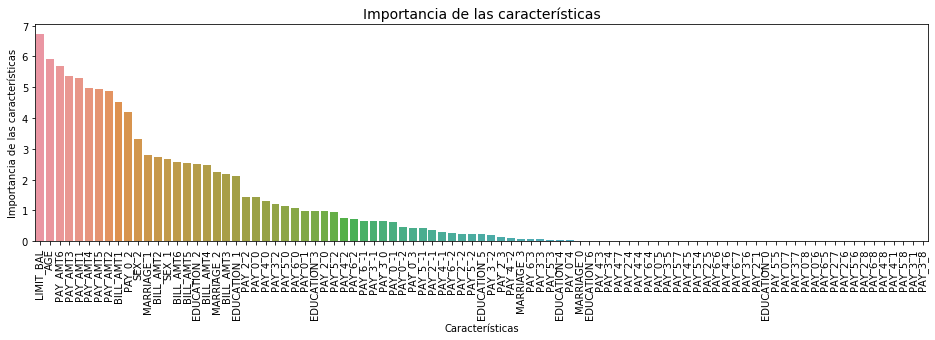

In [492]:
preds = clf.predict(val_feaali_df[predictores_f])

temporal = pd.DataFrame({'Feature': predictores_f, 'Feature importance': clf.feature_importances_})
temporal = temporal.sort_values(by='Feature importance', ascending=False)

plt.figure(figsize = (16,4))
plt.title('Importancia de las características',fontsize=14)

s = sns.barplot(x='Feature', y='Feature importance', data=temporal)
s.set_xticklabels(s.get_xticklabels(),rotation=90)

plt.xlabel('Características')
plt.ylabel('Importancia de las características')

plt.show()

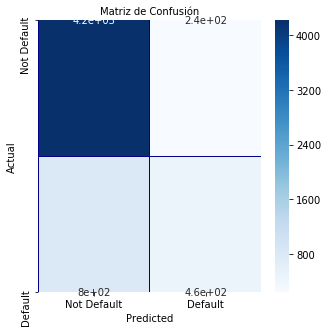

In [493]:
ct = pd.crosstab(val_feaali_df[varDependiente].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(ct, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Matriz de Confusión', fontsize=10)
plt.show()

In [494]:
roc_auc_score(val_feaali_df[varDependiente].values, preds)

0.6553800622769499

In [495]:
## AdaBoostClassifier

clf = AdaBoostClassifier(random_state = 2018,
                         algorithm = 'SAMME.R',
                         learning_rate = 0.8,
                         n_estimators = 100)

clf.fit(train_credit_df_filtered[varIndependientes], train_credit_df_filtered[varDependiente].values)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.8,
                   n_estimators=100, random_state=2018)

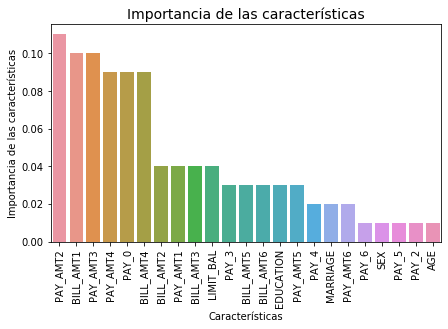

In [496]:
preds = clf.predict(val_credit_df_filtered[varIndependientes])

temporal = pd.DataFrame({'Feature': varIndependientes, 'Feature importance': clf.feature_importances_})
temporal = temporal.sort_values(by='Feature importance', ascending=False)

plt.figure(figsize = (7,4))
plt.title('Importancia de las características', fontsize=14)

s = sns.barplot(x='Feature', y='Feature importance', data=temporal)
s.set_xticklabels(s.get_xticklabels(), rotation=90)

plt.xlabel('Características')
plt.ylabel('Importancia de las características')

plt.show()  

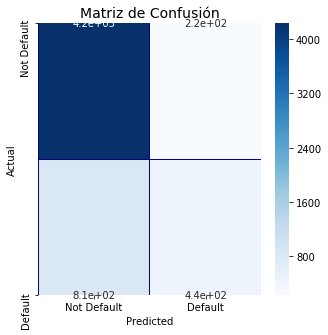

In [497]:
ct = pd.crosstab(val_credit_df_filtered[varDependiente].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))

sns.heatmap(ct, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")

plt.title('Matriz de Confusión', fontsize=14)
plt.show()

In [498]:
roc_auc_score(val_credit_df_filtered[varDependiente].values, preds)

0.6513811063516387

In [499]:
## CatBoostClassifier
clf = CatBoostClassifier(iterations=500,
                         learning_rate=0.02,
                         depth=12,
                         eval_metric='AUC',
                         random_seed = 2018,
                         bagging_temperature = 0.2,
                         od_type='Iter',
                         metric_period = 50,
                         od_wait=100)

clf.fit(train_credit_df_filtered[varIndependientes], train_credit_df_filtered[varDependiente].values, verbose=True)

0:	total: 498ms	remaining: 4m 8s
50:	total: 42.8s	remaining: 6m 16s
100:	total: 1m 31s	remaining: 6m 2s
150:	total: 2m 15s	remaining: 5m 13s
200:	total: 2m 56s	remaining: 4m 22s
250:	total: 3m 36s	remaining: 3m 34s
300:	total: 4m 30s	remaining: 2m 59s
350:	total: 5m 22s	remaining: 2m 17s
400:	total: 6m 20s	remaining: 1m 33s
450:	total: 7m 16s	remaining: 47.4s
499:	total: 8m 1s	remaining: 0us


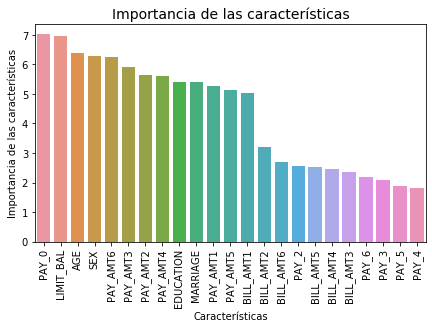

In [500]:
preds = clf.predict(val_credit_df_filtered[varIndependientes])

temporal = pd.DataFrame({'Feature': varIndependientes, 'Feature importance': clf.feature_importances_})
temporal = temporal.sort_values(by='Feature importance',ascending=False)

plt.figure(figsize = (7,4))
plt.title('Importancia de las características',fontsize=14)

s = sns.barplot(x='Feature',y='Feature importance', data=temporal)
s.set_xticklabels(s.get_xticklabels(),rotation=90)

plt.xlabel('Características')
plt.ylabel('Importancia de las características')

plt.show()   

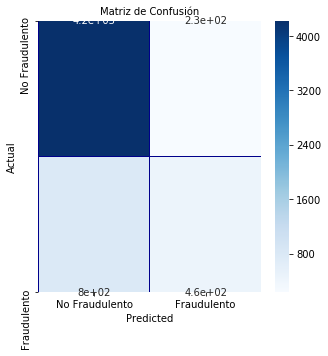

In [501]:
ct = pd.crosstab(val_credit_df_filtered[varDependiente].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(ct, 
            xticklabels=['No Fraudulento', 'Fraudulento'],
            yticklabels=['No Fraudulento', 'Fraudulento'],
            annot=True,
            ax=ax1,
            linewidths=.2,
            linecolor="Darkblue", 
            cmap="Blues")
plt.title('Matriz de Confusión', fontsize=10)
plt.show()

In [502]:
roc_auc_score(val_credit_df_filtered[varDependiente].values, preds)

0.6576439487646931

In [503]:
## XGBoost
# Prepare the train and valid datasets
dtrain = xgb.DMatrix(train_credit_df_filtered[varIndependientes], train_credit_df_filtered[varDependiente].values)
dvalid = xgb.DMatrix(val_credit_df_filtered[varIndependientes], val_credit_df_filtered[varDependiente].values)

#What to monitor (in this case, **train** and **valid**)
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

# Set xgboost parameters
params = {}
params['objective'] = 'binary:logistic'
params['eta'] = 0.039
params['silent'] = True
params['max_depth'] = 2
params['subsample'] = 0.8
params['colsample_bytree'] = 0.9
params['eval_metric'] = 'auc'
params['random_state'] = 2018

model = xgb.train(params, 
                  dtrain, 
                  1000, 
                  watchlist, 
                  early_stopping_rounds=50, 
                  maximize=True, 
                  verbose_eval=50)

[0]	train-auc:0.69313	valid-auc:0.69463
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 50 rounds.
[50]	train-auc:0.76819	valid-auc:0.75279
[100]	train-auc:0.77656	valid-auc:0.75999
[150]	train-auc:0.78255	valid-auc:0.76337
[200]	train-auc:0.78713	valid-auc:0.76651
[250]	train-auc:0.78972	valid-auc:0.76838
[300]	train-auc:0.79204	valid-auc:0.76998
[350]	train-auc:0.79421	valid-auc:0.77110
[400]	train-auc:0.79621	valid-auc:0.77143
[450]	train-auc:0.79806	valid-auc:0.77181
Stopping. Best iteration:
[448]	train-auc:0.79801	valid-auc:0.77191



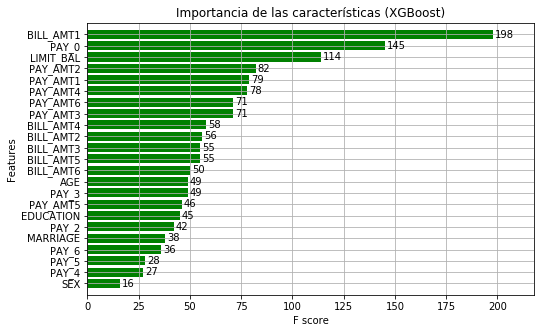

In [504]:
## Plot variable importance

fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
xgb.plot_importance(model, height=0.8, title="Importancia de las características (XGBoost)", ax=ax, color="green") 
plt.show()

In [505]:
## LightGBM

params = {
          'boosting_type': 'gbdt',
          'objective': 'binary',
          'metric':'auc',
          'learning_rate': 0.05,
          'num_leaves': 7,  # we should let it be smaller than 2^(max_depth)
          'max_depth': 4,  # -1 means no limit
          'min_child_samples': 100,  # Minimum number of data need in a child(min_data_in_leaf)
          'max_bin': 100,  # Number of bucketed bin for feature values
          'subsample': 0.9,  # Subsample ratio of the training instance.
          'subsample_freq': 1,  # frequence of subsample, <=0 means no enable
          'colsample_bytree': 0.7,  # Subsample ratio of columns when constructing each tree.
          'min_child_weight': 0,  # Minimum sum of instance weight(hessian) needed in a child(leaf)
          'min_split_gain': 0,  # lambda_l1, lambda_l2 and min_gain_to_split to regularization
          'nthread': 8,
          'verbose': 0,
          'scale_pos_weight':50, # because training data is sightly unbalanced 
         }

categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE','PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

dtrain = lgb.Dataset(train_credit_df_filtered[varIndependientes].values, 
                     label = train_credit_df_filtered[varDependiente].values,
                     feature_name = varIndependientes,
                     categorical_feature = categorical_features)

dvalid = lgb.Dataset(val_credit_df_filtered[varIndependientes].values,
                     label = val_credit_df_filtered[varDependiente].values,
                     feature_name = varIndependientes,
                     categorical_feature = categorical_features)

## Run the model
evals_results = {}

model = lgb.train(params, 
                  dtrain, 
                  valid_sets=[dtrain, dvalid], 
                  valid_names=['train','valid'], 
                  evals_result=evals_results, 
                  num_boost_round=1000,
                  early_stopping_rounds=50,
                  verbose_eval=50, 
                  feval=None)

del dvalid
gc.collect()

C:\Users\rrica\Anaconda3\lib\site-packages\lightgbm\basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds
[50]	train's auc: 0.778444	valid's auc: 0.761172
[100]	train's auc: 0.788771	valid's auc: 0.771512
[150]	train's auc: 0.794805	valid's auc: 0.773997
[200]	train's auc: 0.800124	valid's auc: 0.775235
Early stopping, best iteration is:
[178]	train's auc: 0.797875	valid's auc: 0.775368


50655

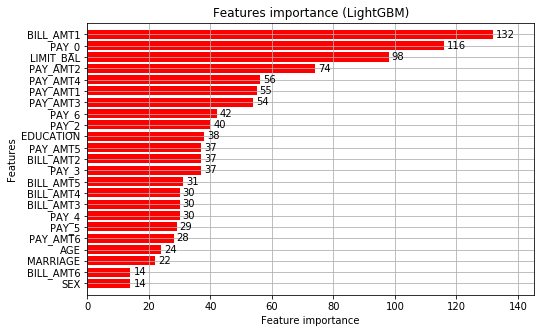

In [506]:
fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
lgb.plot_importance(model, height=0.8, title="Features importance (LightGBM)", ax=ax,color="red") 
plt.show()

In [507]:
kf = KFold(n_splits = 5, random_state = 2018, shuffle = True)
for train_index, test_index in kf.split(credit_df_filtered):
    train_X, valid_X = credit_df_filtered.iloc[train_index], credit_df_filtered.iloc[test_index]

    dtrain = lgb.Dataset(train_X[varIndependientes].values, label=train_X[varDependiente].values,
                     feature_name=varIndependientes)

    dvalid = lgb.Dataset(valid_X[varIndependientes].values, label=valid_X[varDependiente].values,
                     feature_name=varIndependientes)

    evals_results = {}
    model =  lgb.train(params, 
                  dtrain, 
                  valid_sets=[dtrain, dvalid], 
                  valid_names=['train','valid'], 
                  evals_result=evals_results, 
                  num_boost_round=1000,
                  early_stopping_rounds=50,
                  verbose_eval=50, 
                  feval=None)

Training until validation scores don't improve for 50 rounds
[50]	train's auc: 0.778233	valid's auc: 0.761574
[100]	train's auc: 0.787889	valid's auc: 0.769606
[150]	train's auc: 0.794101	valid's auc: 0.773062
[200]	train's auc: 0.799962	valid's auc: 0.77404
[250]	train's auc: 0.804608	valid's auc: 0.774412
[300]	train's auc: 0.808679	valid's auc: 0.774337
Early stopping, best iteration is:
[269]	train's auc: 0.806144	valid's auc: 0.77473
Training until validation scores don't improve for 50 rounds
[50]	train's auc: 0.775094	valid's auc: 0.784139
[100]	train's auc: 0.784239	valid's auc: 0.790517
[150]	train's auc: 0.791045	valid's auc: 0.79112
Early stopping, best iteration is:
[138]	train's auc: 0.789308	valid's auc: 0.791482
Training until validation scores don't improve for 50 rounds
[50]	train's auc: 0.777676	valid's auc: 0.772969
[100]	train's auc: 0.787005	valid's auc: 0.778547
[150]	train's auc: 0.793624	valid's auc: 0.781379
[200]	train's auc: 0.799454	valid's auc: 0.781784
[25